In [8]:
from google.colab import files
uploaded = files.upload()


Saving pose detection.jpg to pose detection.jpg


Saving pose detection.jpg to pose detection (1).jpg


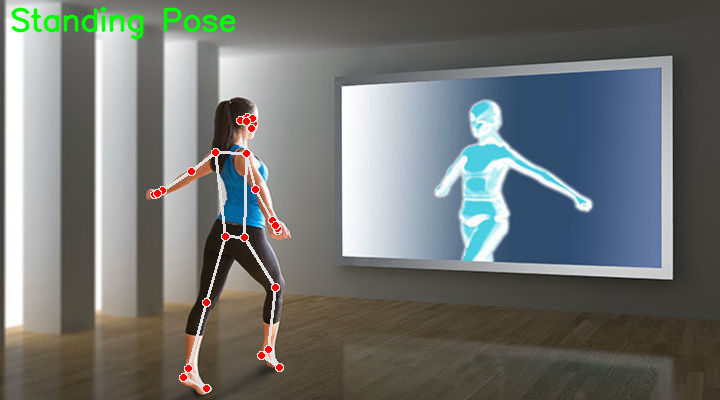

In [11]:
import cv2
import mediapipe as mp
from google.colab.patches import cv2_imshow
from google.colab import files

# Upload image in Colab
uploaded = files.upload()
image_path = list(uploaded.keys())[0]  # Get the filename of the uploaded image

# Initialize MediaPipe Pose
mp_pose = mp.solutions.pose
pose = mp_pose.Pose()
mp_drawing = mp.solutions.drawing_utils

# Load the uploaded image
image = cv2.imread(image_path)

# Convert the BGR image to RGB for MediaPipe processing
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
results = pose.process(rgb_image)

# Define a simple rule-based function for detecting "Standing" pose
def detect_pose_type(landmarks):
    # Example logic to detect if the person is likely standing
    if landmarks:
        left_shoulder = landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER]
        right_shoulder = landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER]
        left_hip = landmarks[mp_pose.PoseLandmark.LEFT_HIP]
        right_hip = landmarks[mp_pose.PoseLandmark.RIGHT_HIP]

        # Check if shoulders and hips are vertically aligned
        shoulder_diff = abs(left_shoulder.y - right_shoulder.y)
        hip_diff = abs(left_hip.y - right_hip.y)

        if shoulder_diff < 0.05 and hip_diff < 0.05:
            return "Standing Pose"
    return "Unknown Pose"

# Get pose label
pose_label = detect_pose_type(results.pose_landmarks.landmark) if results.pose_landmarks else "No Pose Detected"

# Draw the pose landmarks on the image
if results.pose_landmarks:
    mp_drawing.draw_landmarks(
        image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

# Add the pose label to the image
cv2.putText(image, pose_label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)

# Display the image with pose landmarks and label
cv2_imshow(image)
